## Business Problem: Airlines Data Clustering Project

#### Airlines strive to improve customer satisfaction and optimize operations by understanding customer segmentation. The objective of this project is to simplify the process of identifying customer groups with similar characteristics, which can help tailor services, improve marketing strategies, and enhance overall customer experience.

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
# Import the dataset
file_path = r"C:\Users\Swapnil Mishra\Desktop\DS\Hierarchical Clustering\Dataset_Assignment Clustering\EastWestAirlines.xlsx"
# Read the contents of Sheet2
df = pd.read_excel(file_path, sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Exploratory Data Analysis
# 1st Moment Business Decision
print(df.select_dtypes(include = [np.number]).mean())
print('\n')
print(df.select_dtypes(include = [np.number]).median())
print('\n')
print(df.mode())

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64


ID#                   2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64


       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1   1000.0         0.0        1.0        1.0        1.0          0.0   
1        2      NaN         NaN        NaN      

In [5]:
# 2nd Moment Business Decision
print(df.select_dtypes(include = [np.number]).var())
print('\n')
print(df.select_dtypes(include = [np.number]).std())

ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64


ID#                    1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64


In [6]:
# 3rd Moment Business Decision
df.select_dtypes(include = [np.number]).skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

In [7]:
# 4th Moment Business Decision
df.select_dtypes(include = [np.number]).kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [13]:
df1 = df.drop(['ID#','Award?'],axis=1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [14]:
# Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
# Normalized dataframe
df_norm=norm_func(df1)

In [16]:
# Descriptive Statistics 
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Automated Libraries
# Auto EDA
# Sweetviz
import sweetviz
my_report = sweetviz.analyze([df,'df'])
my_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
# Another Auto EDA Library
# D-Tale
import dtale
d = dtale.show(df)
d.open_browser()

In [19]:
# Check for na values in the data
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

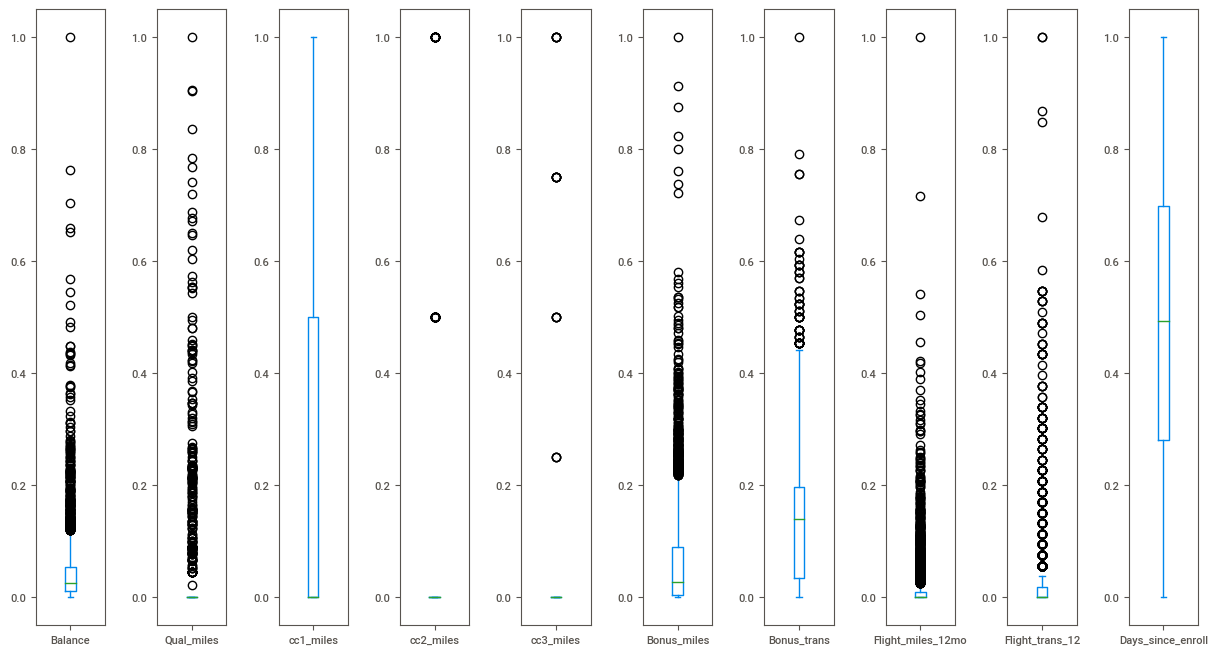

In [29]:
import PyQt5
df_norm.plot(kind = 'box',subplots = True,sharey = False,figsize = (15,8))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [5]:
# Data Preprocessing
# Outlier Analysis
# Boxplots show outliers in all except cc1_miles,Days_since_enroll,Award
# We shall use Winsorization Technique to treat outliers
# Winsorization function rounds off the exceptional data points based on 
# Capping method used in parameters/hyperparameters selection.

In [40]:
winsor = Winsorizer(capping_method = 'iqr',# Choose IQR rule boundary
                   tail = 'both',# cap left,right or both tails
                   fold = 1.5,
                   variables = ['Balance'])
df_norm['Balance'] = winsor.fit_transform(df_norm[['Balance']])

In [41]:
winsor = Winsorizer(
    capping_method='gaussian',  # Use Gaussian capping
    tail='both',  # Cap both the lower and upper tails
    fold=1,  # 5% quantile for lower and upper caps
    variables=['Qual_miles']
)
df_norm['Qual_miles'] = winsor.fit_transform(df_norm[['Qual_miles']])

In [42]:
winsor = Winsorizer(
    capping_method='gaussian',  # Use Gaussian method
    tail='both',  # Cap both tails
    fold=1.5,  # Cap at 3 standard deviations
    variables=['cc2_miles']
)
df_norm['cc2_miles'] = winsor.fit_transform(df_norm[['cc2_miles']])

In [43]:
winsor = Winsorizer(
    capping_method='gaussian',  # Use Gaussian method
    tail='both',  # Cap both tails
    fold=1.5,  # Cap at 3 standard deviations
    variables=['cc3_miles']
)
df_norm['cc3_miles'] = winsor.fit_transform(df_norm[['cc3_miles']])

In [44]:
winsor = Winsorizer(capping_method = 'iqr',# Choose IQR rule boundary
                   tail = 'both',# cap left,right or both tails
                   fold = 1.5,
                   variables = ['Bonus_miles'])
df_norm['Bonus_miles'] = winsor.fit_transform(df_norm[['Bonus_miles']])

In [45]:
winsor = Winsorizer(capping_method = 'iqr',# Choose IQR rule boundary
                   tail = 'both',# cap left,right or both tails
                   fold = 1.5,
                   variables = ['Bonus_trans'])
df_norm['Bonus_trans'] = winsor.fit_transform(df_norm[['Bonus_trans']])

In [46]:
winsor = Winsorizer(capping_method = 'iqr',# Choose IQR rule boundary
                   tail = 'both',# cap left,right or both tails
                   fold = 1.5,
                   variables = ['Flight_miles_12mo'])
df_norm['Flight_miles_12mo'] = winsor.fit_transform(df_norm[['Flight_miles_12mo']])

In [47]:
winsor = Winsorizer(capping_method = 'iqr',# Choose IQR rule boundary
                   tail = 'both',# cap left,right or both tails
                   fold = 1.5,
                   variables = ['Flight_trans_12'])
df_norm['Flight_trans_12'] = winsor.fit_transform(df_norm[['Flight_trans_12']])

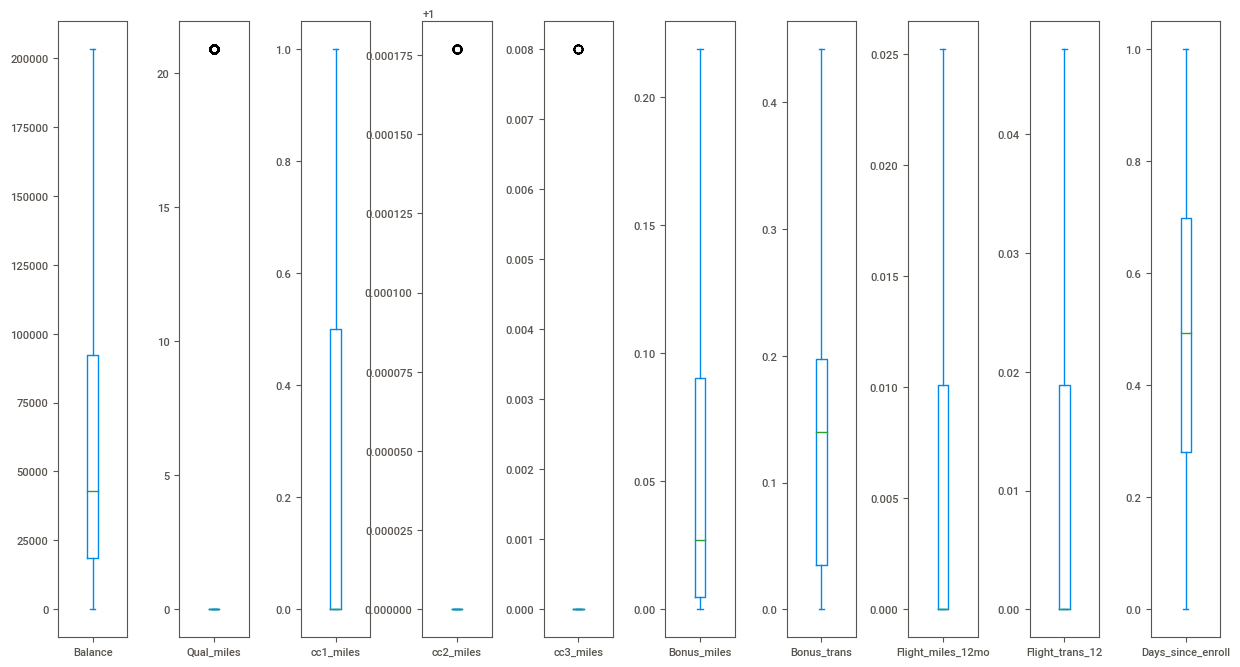

In [48]:
import PyQt5
df_norm.plot(kind = 'box',subplots = True,sharey = False,figsize = (15,8))
plt.subplots_adjust(wspace = 0.75)
plt.show()

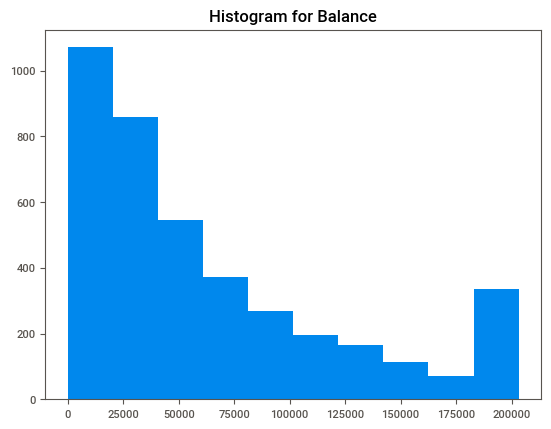

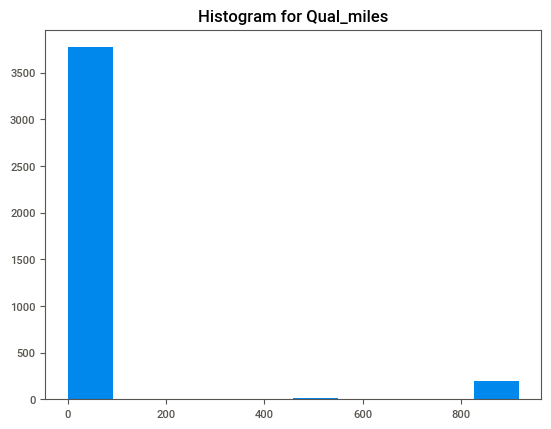

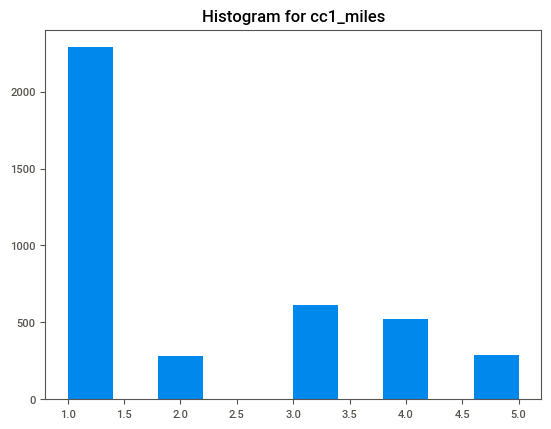

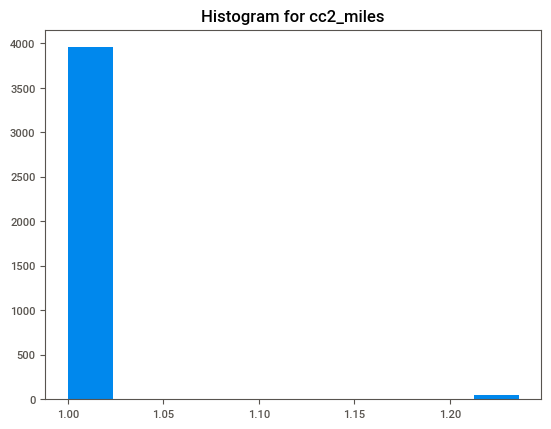

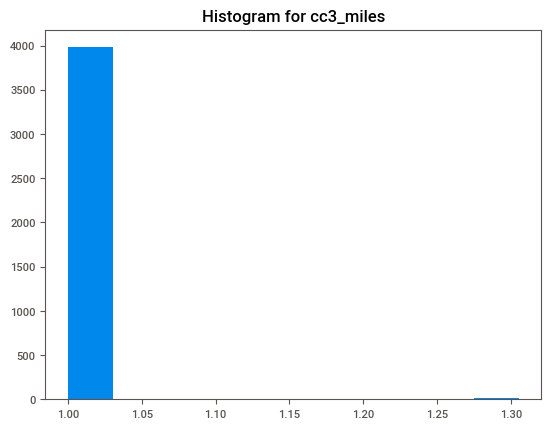

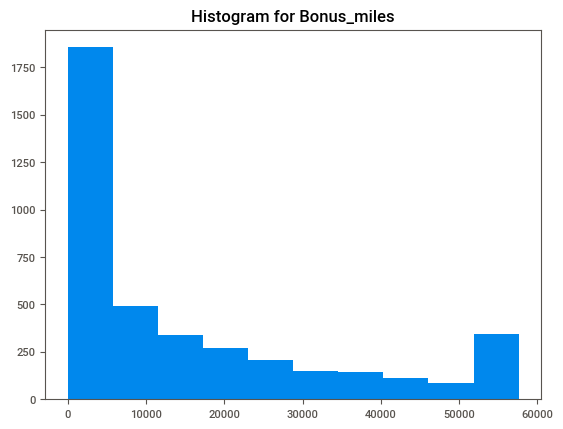

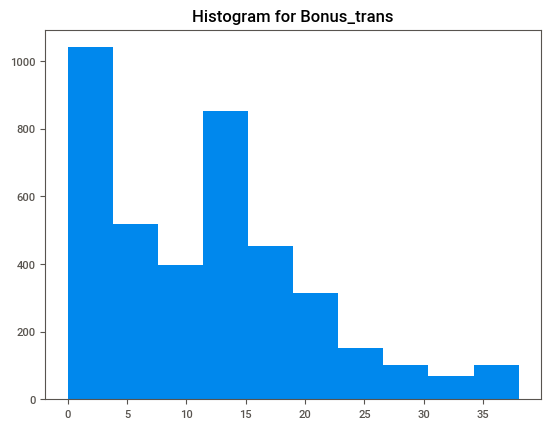

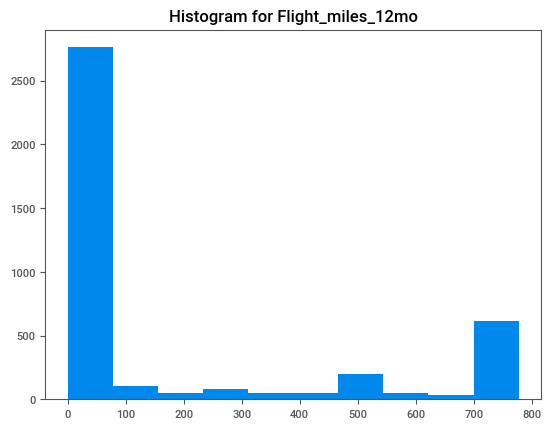

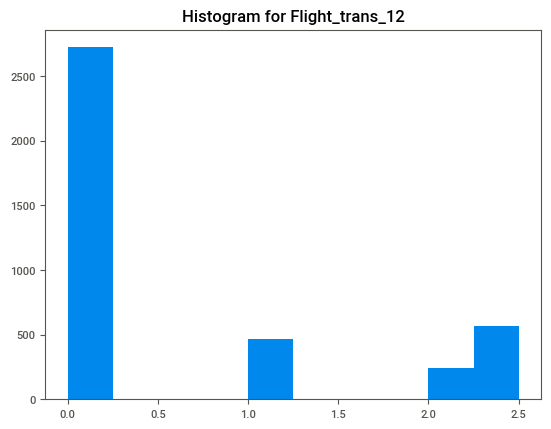

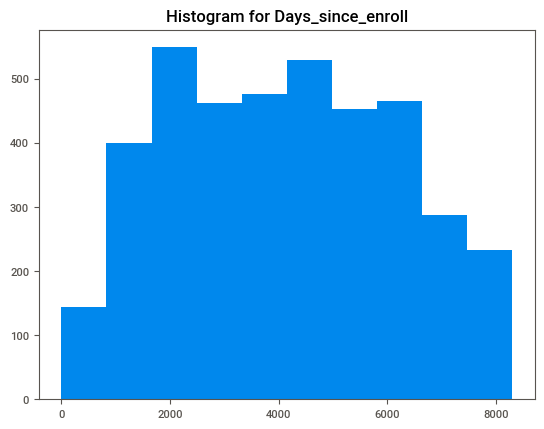

In [50]:
# Graphical Representation
%matplotlib inline 
df.columns
# Histogram desscribes the spread of data
for i in df_norm.columns:
    plt.hist(x = df[i])
    plt.title('Histogram for ' + str(i))
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



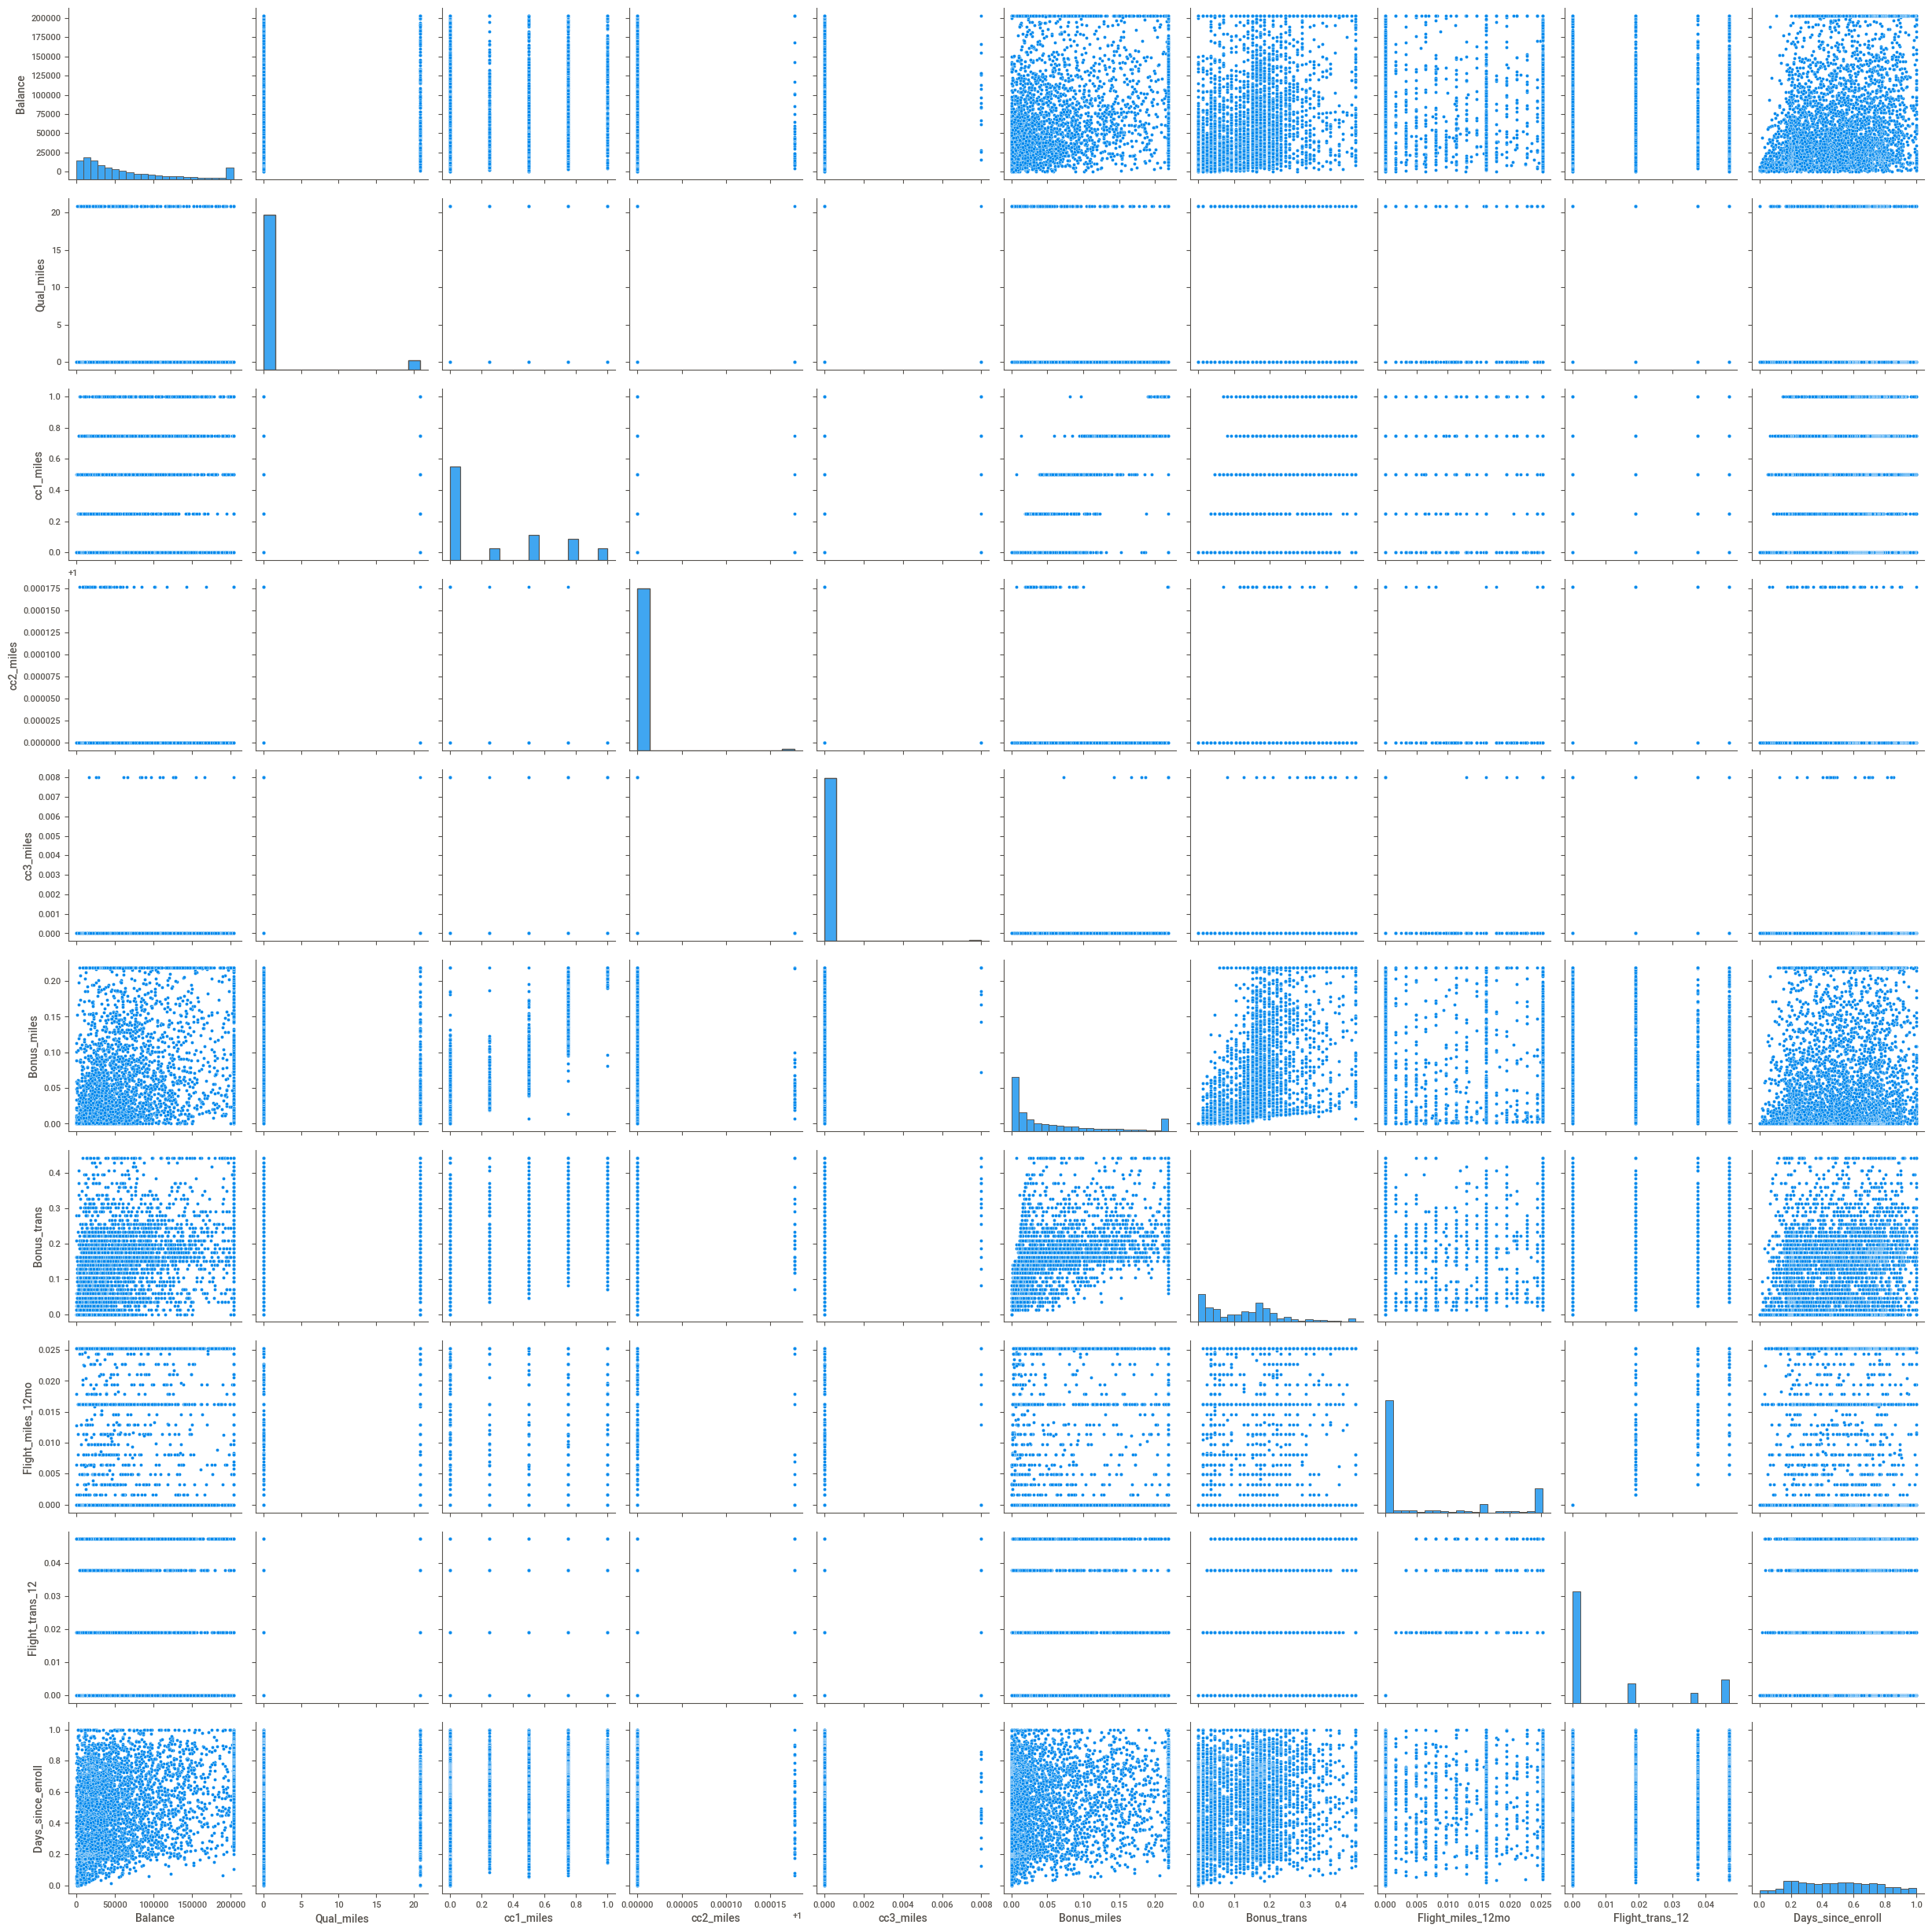

In [52]:
sns.pairplot(df_norm)

In [53]:
df_norm.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.132479,0.446510,-0.015260,0.041835,0.494422,0.409017,0.297045,0.295565,0.286143
Qual_miles,0.132479,1.000000,0.022457,-0.015016,-0.000279,0.070615,0.095727,0.203797,0.211284,0.028226
cc1_miles,0.446510,0.022457,1.000000,-0.069668,0.064928,0.912531,0.627786,0.098786,0.087618,0.230849
cc2_miles,-0.015260,-0.015016,-0.069668,1.000000,-0.007010,-0.005774,0.064848,0.010917,0.018131,-0.007555
cc3_miles,0.041835,-0.000279,0.064928,-0.007010,1.000000,0.138353,0.105557,0.016197,0.009303,0.012056
Bonus_miles,0.494422,0.070615,0.912531,-0.005774,0.138353,1.000000,0.663558,0.205801,0.193669,0.217320
Bonus_trans,0.409017,0.095727,0.627786,0.064848,0.105557,0.663558,1.000000,0.310543,0.308518,0.170308
Flight_miles_12mo,0.297045,0.203797,0.098786,0.010917,0.016197,0.205801,0.310543,1.000000,0.942734,0.095019
Flight_trans_12,0.295565,0.211284,0.087618,0.018131,0.009303,0.193669,0.308518,0.942734,1.000000,0.091898
Days_since_enroll,0.286143,0.028226,0.230849,-0.007555,0.012056,0.217320,0.170308,0.095019,0.091898,1.000000


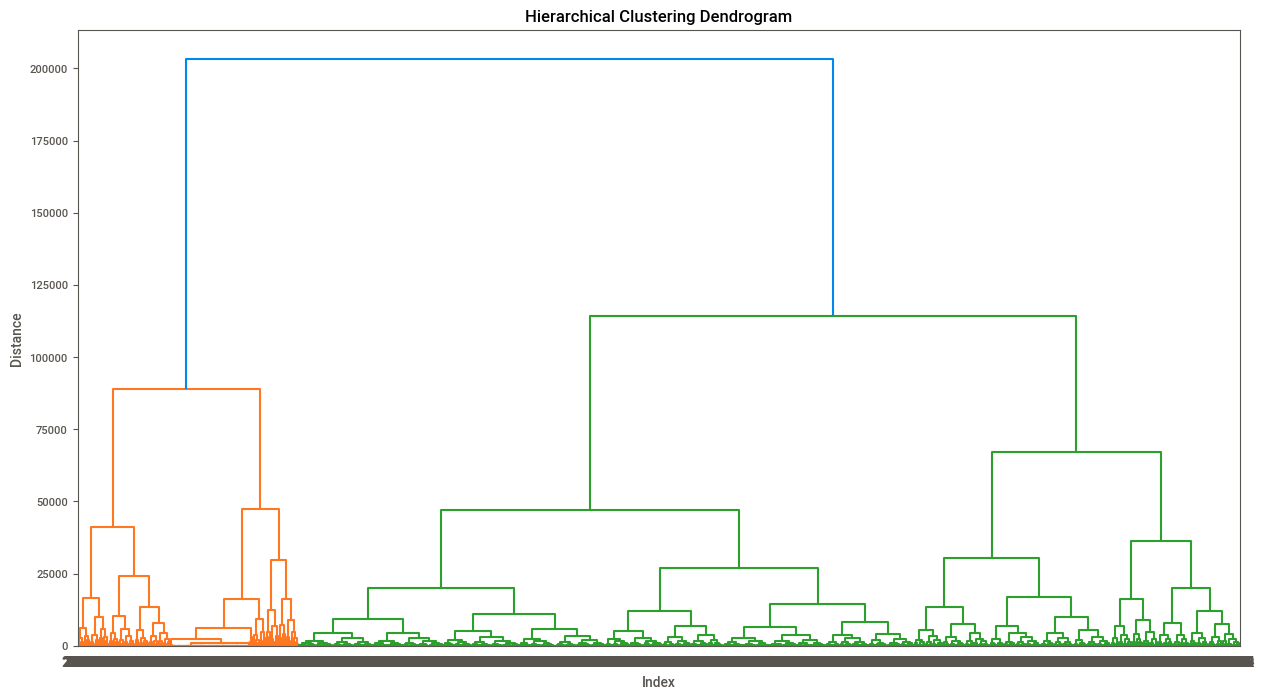

In [54]:
# Hierarchical Clustering
#For creating dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_norm,method="complete",metric="euclidean")
#Dendrogram
plt.figure(figsize=(15,8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
               leaf_rotation=0,
               leaf_font_size=10
               )
plt.show()

In [59]:
#Now applying agglomerative clustering choosing 4 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering            
h_complete=AgglomerativeClustering(n_clusters=4,linkage="complete",metric = "euclidean").fit(df_norm)
h_complete.labels_
cluster_labels=pd.Series(h_complete.labels_)
df1['clust']=cluster_labels
df=df1.iloc[:,[10,0,1,2,3,4,5,6,7,8,9]]
df.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,2,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,2,41354,0,1,1,1,4123,4,0,0,7034
3,2,14776,0,1,1,1,500,1,0,0,6952
4,0,97752,0,4,1,1,43300,26,2077,4,6935


In [60]:
# Aggregate mean of each cluster
df.iloc[:,:].groupby(df.clust).mean()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,0.0,74111.769643,126.229464,2.497321,1.011607,1.016071,22086.514286,13.963393,524.006250,1.508036,4294.622321
1,1.0,283782.366972,355.355505,3.032110,1.011468,1.013761,38721.000000,18.623853,1208.701835,3.545872,5272.876147
2,2.0,21094.948138,93.709571,1.487977,1.017445,1.005186,7904.004715,8.218765,227.606318,0.713343,3672.387082
3,3.0,133090.155280,252.310559,2.984472,1.009317,1.043478,31610.540373,16.164596,755.059006,2.313665,4882.096273


In [61]:
# Using Average Linkage
h_complete=AgglomerativeClustering(n_clusters=4,linkage="average",metric = "euclidean").fit(df_norm)
h_complete.labels_
cluster_labels=pd.Series(h_complete.labels_)
df1['clust']=cluster_labels
df=df1.iloc[:,[10,0,1,2,3,4,5,6,7,8,9]]
df.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,2,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,2,41354,0,1,1,1,4123,4,0,0,7034
3,2,14776,0,1,1,1,500,1,0,0,6952
4,3,97752,0,4,1,1,43300,26,2077,4,6935


In [62]:
# Aggregate mean of each cluster
df.iloc[:,:].groupby(df.clust).mean()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,0.0,270873.807453,323.641822,3.043478,1.010352,1.016563,38377.867495,18.354037,1185.443064,3.420290,5276.343685
1,1.0,122252.515738,235.769976,2.854722,1.014528,1.041162,29420.721550,15.767554,726.087167,2.278450,4696.665860
2,2.0,26872.505486,104.230016,1.616771,1.016850,1.005486,9615.723354,9.027821,277.107367,0.843652,3745.476881
3,3.0,80636.546279,102.771325,2.651543,1.007260,1.018149,24202.624319,14.482759,472.127042,1.355717,4398.303085


In [64]:
# Cluster Evaluation
# Silhouette co-efficient
from sklearn import metrics
metrics.silhouette_score(df_norm,cluster_labels)

0.572880643886211

In [65]:
from clusteval import clusteval
import numpy as np

# Silhoutte cluster evaluation
ce = clusteval(evaluate='silhouette')

In [66]:
df_array = np.array(df_norm)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [3].
[clusteval] >INFO> Fin.


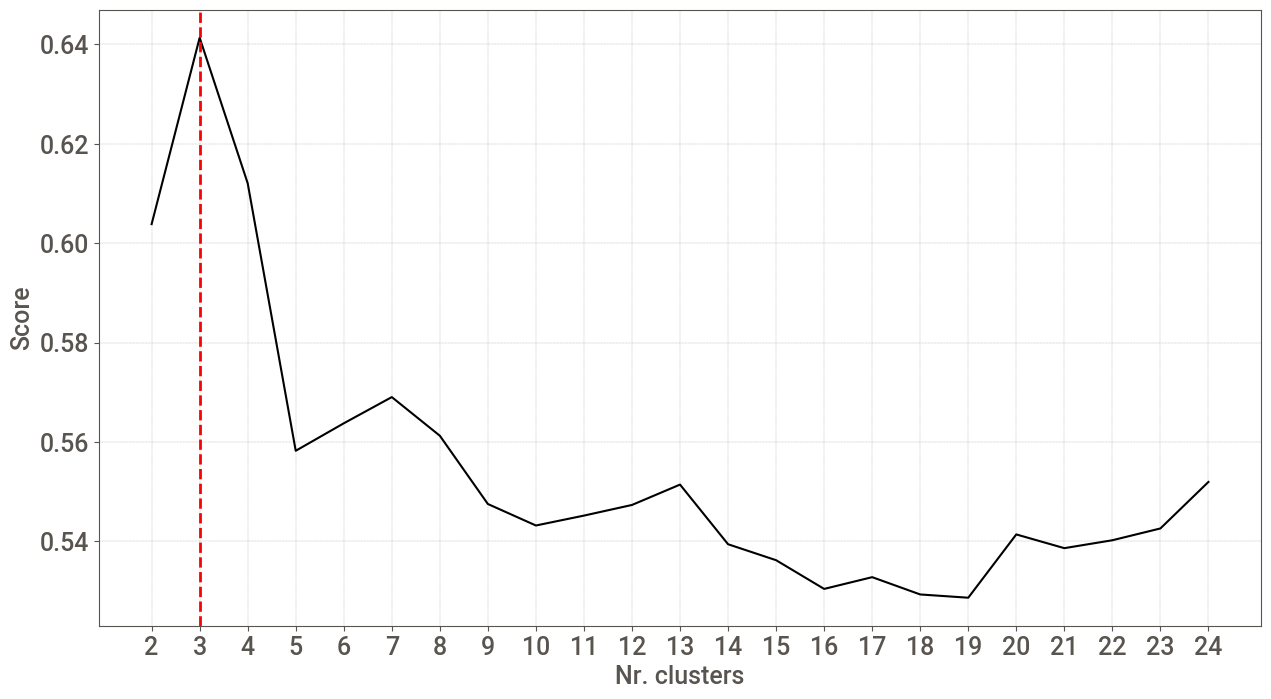

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [67]:
# Fit
ce.fit(df_array)

# Plot
ce.plot()

In [68]:
# By using 3 as a cluster from Silhouette Coefficient

# Using Complete Linkage
h_complete=AgglomerativeClustering(n_clusters=3,linkage="complete",metric = "euclidean").fit(df_norm)
h_complete.labels_
cluster_labels=pd.Series(h_complete.labels_)
df1['clust']=cluster_labels
df=df1.iloc[:,[10,0,1,2,3,4,5,6,7,8,9]]
df.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,2,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,2,41354,0,1,1,1,4123,4,0,0,7034
3,2,14776,0,1,1,1,500,1,0,0,6952
4,1,97752,0,4,1,1,43300,26,2077,4,6935


In [69]:
# Aggregate mean of each cluster
df.iloc[:,:].groupby(df.clust).mean()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,0.0,219767.997361,311.581794,3.011873,1.010554,1.026385,35700.461741,17.579156,1015.993404,3.022427,5106.872032
1,1.0,74111.769643,126.229464,2.497321,1.011607,1.016071,22086.514286,13.963393,524.006250,1.508036,4294.622321
2,2.0,21094.948138,93.709571,1.487977,1.017445,1.005186,7904.004715,8.218765,227.606318,0.713343,3672.387082


In [70]:
#Calinski Harabasz Score - Higher score shows stronger cluster seperation
metrics.calinski_harabasz_score(df_norm,cluster_labels)

15595.3567793378

In [71]:
# Davies Bouldin Score - Lower the score better the cluster seperation
metrics.davies_bouldin_score(df_norm,cluster_labels)

0.5060106279125681

In [72]:
#Creating a csv file
df1.to_csv('airlines.csv',encoding="utf-8")
import os
os.getcwd()

'C:\\Users\\Swapnil Mishra\\Desktop\\DS_Codes_Swapnil\\Hierarchical Clustering'